In [1]:
##importing necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [2]:
## loading train data
train_df=pd.read_csv("C:/Users/vanat/Downloads/train.csv")
train_df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [3]:
## Loading test data
test_df=pd.read_csv("C:/Users/vanat/Downloads/test.csv")
test_df.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


In [5]:
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

In [6]:
test_df.head(2)

,tweet
0,#studiolife #aislife #requires #passion #dedic...
1,@user #white #supremacists want everyone to s...


## Text preprocessing

In [8]:
train_df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [9]:
train_df['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

In [10]:
#Hate speech 
hate_tweet=train_df[train_df['label']==1]['tweet']
hate_tweet

13       @user #cnn calls #michigan middle school 'buil...
14       no comment!  in #australia   #opkillingbay #se...
17                                  retweet if you agree! 
23         @user @user lumpy says i am a . prove it lumpy.
34       it's unbelievable that in the 21st century we'...
                               ...                        
31934    lady banned from kentucky mall. @user  #jcpenn...
31946    @user omfg i'm offended! i'm a  mailbox and i'...
31947    @user @user you don't have the balls to hashta...
31948     makes you ask yourself, who am i? then am i a...
31960    @user #sikh #temple vandalised in in #calgary,...
Name: tweet, Length: 2242, dtype: object

In [11]:
# Non Hate speech 
non_hate_tweet=train_df[train_df['label']==0]['tweet']
non_hate_tweet

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31956    off fishing tomorrow @user carnt wait first ti...
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31961                     thank you @user for you follow  
Name: tweet, Length: 29720, dtype: object

In [12]:
!pip install wordcloud

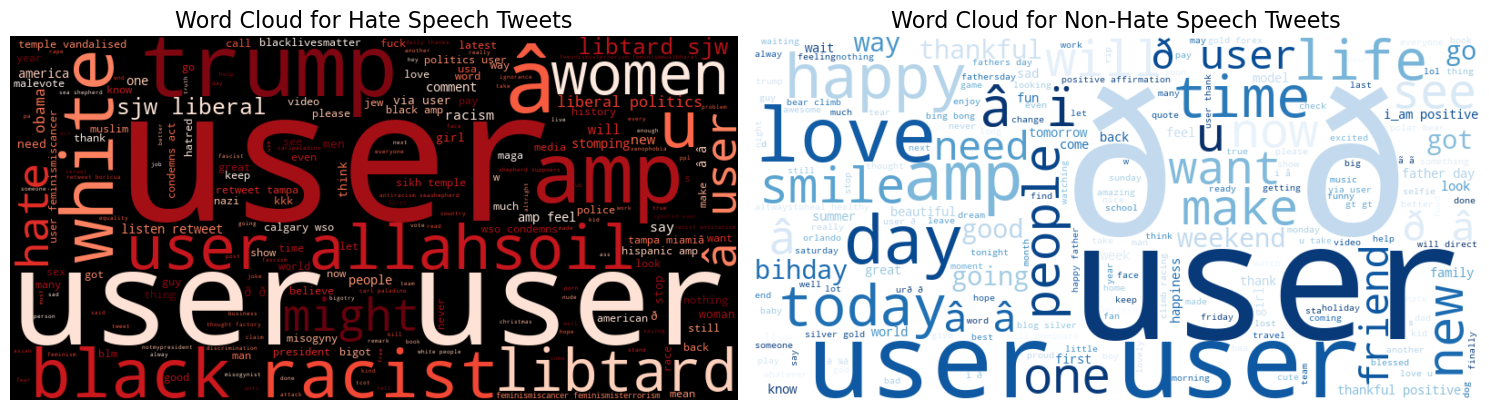

In [13]:
from wordcloud import WordCloud
# Combine all hate speech tweets into a single string
hate_speech_text = " ".join(hate_tweet)

# Combine all non-hate speech tweets into a single string
non_hate_speech_text = " ".join(non_hate_tweet)

# Generate word clouds
hate_wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(hate_speech_text)
non_hate_wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(non_hate_speech_text)

# Display the word clouds
plt.figure(figsize=(15, 8))

# Hate Speech Word Cloud
plt.subplot(1, 2, 1)
plt.imshow(hate_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Hate Speech Tweets", fontsize=16)

# Non-Hate Speech Word Cloud
plt.subplot(1, 2, 2)
plt.imshow(non_hate_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Non-Hate Speech Tweets", fontsize=16)

plt.tight_layout()
plt.show()


In [14]:
## since the word user does not posses any valid info here we can remove it..because they are more widely spread in both hate and non hate speach

# Function to remove the word "user" from a tweet
def remove_user_word(tweet):
    return " ".join([word for word in tweet.split() if word.lower() != "@user"])

# Apply the function to the 'tweet' column in train and test datasets
train_df['tweet'] = train_df['tweet'].apply(remove_user_word)
test_df['tweet'] = test_df['tweet'].apply(remove_user_word)

# Display the first few rows of each dataframe to verify
print("Updated Train DataFrame:")
print(train_df.head())

print("\nUpdated Test DataFrame:")
print(test_df.head())


Updated Train DataFrame:
   label                                              tweet
0      0  when a father is dysfunctional and is so selfi...
1      0  thanks for #lyft credit i can't use cause they...
2      0                                bihday your majesty
3      0  #model i love u take with u all the time in ur...
4      0                factsguide: society now #motivation

Updated Test DataFrame:
                                               tweet
0  #studiolife #aislife #requires #passion #dedic...
1  #white #supremacists want everyone to see the ...
2  safe ways to heal your #acne!! #altwaystoheal ...
3  is the hp and the cursed child book up for res...
4  3rd #bihday to my amazing, hilarious #nephew e...


In [15]:
##removal of punctuation

import string
string.punctuation

def remove_punctuations(tweet):
    punctuations =string.punctuation
    return tweet.translate(str.maketrans('','',punctuations))

In [16]:
train_df['tweet']=train_df['tweet'].apply(lambda x:remove_punctuations (x))
test_df['tweet']=test_df['tweet'].apply(lambda x:remove_punctuations (x))

In [17]:
test_df.head(5)

,tweet
0,studiolife aislife requires passion dedication...
1,white supremacists want everyone to see the ne...
2,safe ways to heal your acne altwaystoheal heal...
3,is the hp and the cursed child book up for res...
4,3rd bihday to my amazing hilarious nephew eli ...


In [18]:
## Removing special characters

import re
train_df['tweet']=train_df['tweet'].apply(lambda x:re.sub(r'[^\w ]+', "",x))
test_df['tweet']=test_df['tweet'].apply(lambda x:re.sub(r'[^\w ]+', "",x))
train_df['tweet']=train_df['tweet'].apply(lambda x:re.sub('[^a-zA-Z0-9]',' ',x))
test_df['tweet']=test_df['tweet'].apply(lambda x:re.sub('[^a-zA-Z0-9]',' ',x))
train_df['tweet']=train_df['tweet'].apply(lambda x:re.sub('\d+',' ',x))
test_df['tweet']=test_df['tweet'].apply(lambda x:re.sub('\d+',' ',x))

##Removing extra spaces
train_df['tweet']=train_df['tweet'].apply(lambda x:' '.join(x.split()))
test_df['tweet']=test_df['tweet'].apply(lambda x:' '.join(x.split()))

In [19]:
train_df.head(5)

,label,tweet
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for lyft credit i cant use cause they d...
2,0,bihday your majesty
3,0,model i love u take with u all the time in ur
4,0,factsguide society now motivation


In [20]:
## Converting to Lowercase
train_df['tweet'].str.lower()
test_df['tweet'].str.lower()

0        studiolife aislife requires passion dedication...
1        white supremacists want everyone to see the ne...
2        safe ways to heal your acne altwaystoheal heal...
3        is the hp and the cursed child book up for res...
4        rd bihday to my amazing hilarious nephew eli a...
                               ...                        
17192    thought factory leftright polarisation trump u...
17193    feeling like a mermaid hairflip neverready for...
17194    hillary campaigned today in ohioomg amp used w...
17195    happy at work conference right mindset leads t...
17196    my song so glad free download shoegaze newmusi...
Name: tweet, Length: 17197, dtype: object

In [21]:
##rare words removal for train data

from collections import Counter
word_count=Counter()
for text in train_df['tweet']:
    for word in text.split():
        word_count[word] += 1
word_count.most_common(10)

rare_words=set((word,wc) for (word,wc) in word_count.most_common()[:-100:-1])

def remove_rare_words(tweet):
    return " ".join([word for word in tweet.split() if word not in rare_words])

In [22]:
train_df=train_df.applymap(lambda x: remove_rare_words(x)if isinstance(x, str) else x)
train_df.head(5)

,label,tweet
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for lyft credit i cant use cause they d...
2,0,bihday your majesty
3,0,model i love u take with u all the time in ur
4,0,factsguide society now motivation


In [23]:
##rare words removal for test data

from collections import Counter
word_count_1=Counter()
for text in test_df['tweet']:
    for word in text.split():
        word_count_1[word] += 1
word_count_1.most_common(10)

rare_words_1=set((word,wc) for (word,wc) in word_count_1.most_common()[:-100:-1])

def remove_rare_words_1(tweet):
    return " ".join([word for word in tweet.split() if word not in rare_words_1])

In [24]:
test_df=test_df.applymap(lambda x: remove_rare_words_1(x)if isinstance(x, str) else x)
test_df.head(5)

,tweet
0,studiolife aislife requires passion dedication...
1,white supremacists want everyone to see the ne...
2,safe ways to heal your acne altwaystoheal heal...
3,is the hp and the cursed child book up for res...
4,rd bihday to my amazing hilarious nephew eli a...


# Removal of stopwords

In [26]:
# Removal of stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vanat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [27]:
## Removal of stopwords:
from nltk.corpus import stopwords as nltk_stopwords
# Create a set of stopwords
stopwords_set = set(nltk_stopwords.words('english'))

def remove_stopwords(text):
    return " ".join([word for word in text.split() if word.lower() not in stopwords_set])

train_df['tweet']= train_df['tweet'].apply(remove_stopwords)
test_df['tweet']= test_df['tweet'].apply(remove_stopwords)


In [28]:
train_df.head()

,label,tweet
0,0,father dysfunctional selfish drags kids dysfun...
1,0,thanks lyft credit cant use cause dont offer w...
2,0,bihday majesty
3,0,model love u take u time ur
4,0,factsguide society motivation


## Stemming and Lemmentization

In [30]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vanat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vanat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [31]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize

# Initializing stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()


In [32]:
def preprocess_text(text, method='lemmatization'):
    # Tokenising the text
    tokens = word_tokenize(text)
    # Apply stemming / lemmatization
    if method == 'stemming':
        tokens = [stemmer.stem(token) for token in tokens]
    elif method == 'lemmatization':
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Reconstruct the text
    return ' '.join(tokens)


In [33]:
train_df['tweet'] = train_df['tweet'].apply(lambda x: preprocess_text(x, method='lemmatization'))
test_df['tweet'] = test_df['tweet'].apply(lambda x: preprocess_text(x, method='lemmatization'))

In [34]:
test_df['tweet'].head(10)

0    studiolife aislife requires passion dedication...
1    white supremacist want everyone see new bird m...
2     safe way heal acne altwaystoheal healthy healing
3    hp cursed child book reservation already yes h...
4    rd bihday amazing hilarious nephew eli ahmir u...
5                                       choose momtips
6    something inside dy eye ness smokeyeyes tired ...
7            finishedtattooinkedinkloveit thanksaleeee
8      never understand dad left young deep inthefeels
9    delicious food lovelife capetown mannaepicure ...
Name: tweet, dtype: object

In [35]:
train_df['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

#Now , since we have completed the preprocessing step, our data is ready for the model creation. We can train various machine learning models and choose the model which gives high overall perfomances.Since we have unbalanced labels, we here use SMOTE technique to balance the data

## MODEL CREATION

In [38]:
## Importing the necessary libraries needed:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline,Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,recall_score,f1_score

In [39]:
X = train_df['tweet']
y = train_df['label']
X_test = test_df['tweet']

In [40]:
## Converting the text data into vectors:
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Spliting the dataset into training and validation sets
X_train, X_test, y_train, y_test= train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

## TRAINING AND EVALUATING MODELS

In [42]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000)
svm = SVC()
rf = RandomForestClassifier()


In [43]:
log_reg.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=1000)

In [44]:
svm.fit(X_resampled, y_resampled)

SVC()

In [45]:
rf.fit(X_resampled, y_resampled)

RandomForestClassifier()

In [46]:
## Model prediction
log_reg_preds = log_reg.predict(X_test)
svm_preds = svm.predict(X_test)
rf_preds = rf.predict(X_test)


In [47]:
# Evaluate models
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"{model_name} Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    
    # Evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"{model_name} Precision: {precision:.2f}")
    print(f"{model_name} Recall: {recall:.2f}")
    print(f"{model_name} F1-Score: {f1:.2f}")
    print("\n")

In [48]:
# Evaluating on the test data
evaluate_model(y_test, log_reg_preds, "Logistic Regression")
evaluate_model(y_test, svm_preds, "SVM")
evaluate_model(y_test, rf_preds, "Random Forest")


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.92      0.95      5937
           1       0.45      0.83      0.58       456

    accuracy                           0.91      6393
   macro avg       0.72      0.88      0.77      6393
weighted avg       0.95      0.91      0.93      6393

Logistic Regression Confusion Matrix:
[[5467  470]
 [  76  380]]
Logistic Regression Accuracy: 0.91
Logistic Regression Precision: 0.95
Logistic Regression Recall: 0.91
Logistic Regression F1-Score: 0.93


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      5937
           1       0.92      0.46      0.61       456

    accuracy                           0.96      6393
   macro avg       0.94      0.73      0.79      6393
weighted avg       0.96      0.96      0.95      6393

SVM Confusion Matrix:
[[5920   17]
 [ 248  208]]
SVM Accuracy: 0.96
SV

In [49]:
# Cross-validation
models = {'Logistic Regression': log_reg, 'SVM': svm, 'Random Forest': rf}

In [50]:
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_vectorized, y, cv=5, scoring='f1_weighted',n_jobs=-1)
    print(f"{model_name} Cross-Validated F1-Score: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Logistic Regression Cross-Validated F1-Score: 0.93 ± 0.00
SVM Cross-Validated F1-Score: 0.95 ± 0.00
Random Forest Cross-Validated F1-Score: 0.96 ± 0.00


In [51]:
# Define models and their hyperparameters for Grid Search
hyperparams = {
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']},
    'SVM': {
        'C': [1, 10],
        'kernel': ['linear'],
        'gamma': ['scale']},
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None,20]}}
best_models = {}


In [52]:
for model_name, params in hyperparams.items():
    print(f"Optimizing {model_name}...")
    model = models[model_name]
    grid_search = GridSearchCV(model, params, cv=5, scoring='f1_weighted', n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    best_models[model_name] = grid_search.best_estimator_

Optimizing Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Optimizing SVM...
Best parameters for SVM: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Optimizing Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 100}


In [53]:
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    evaluate_model(y_test, y_pred, model_name)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.96      5937
           1       0.48      0.79      0.60       456

    accuracy                           0.92      6393
   macro avg       0.73      0.86      0.78      6393
weighted avg       0.95      0.92      0.93      6393

Logistic Regression Confusion Matrix:
[[5544  393]
 [  94  362]]
Logistic Regression Accuracy: 0.92
Logistic Regression Precision: 0.95
Logistic Regression Recall: 0.92
Logistic Regression F1-Score: 0.93


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95      5937
           1       0.42      0.74      0.54       456

    accuracy                           0.91      6393
   macro avg       0.70      0.83      0.74      6393
weighted avg       0.94      0.91      0.92      6393

SVM Confusion Matrix:
[[5479  458]
 [ 120  336]]
SVM Accuracy: 0.91
SV

In [54]:
##since random forest model shows great performance compared to others..choosing random forest model as the best model
final_model = best_models['Random Forest']
final_predictions = final_model.predict(X_test)
print("Final Predictions on Test Dataset:")
print(final_predictions)

Final Predictions on Test Dataset:
[0 0 0 ... 0 0 1]


In [55]:
predictions_series = pd.Series(final_predictions)

# Count the labels 0's and 1's
label_counts = predictions_series.value_counts()
num_hate_speech = label_counts.get(1, 0) 
num_non_hate_speech = label_counts.get(0, 0) 

In [56]:
print(f"Number of hate speech (1 labels): {num_hate_speech}")
print(f"Number of non-hate speech (0 labels): {num_non_hate_speech}")

Number of hate speech (1 labels): 408
Number of non-hate speech (0 labels): 5985


Thus there are 408 hate speech tweets in the test data

## MODEL INFERENCE

In [63]:
# SAVING THE MODEL 
X_train_text = train_df['tweet']  

# TfidfVectorizer
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X_train_text) 

# model fitting
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# save both the model and vectorizer
import joblib
joblib.dump(final_model, 'final_random_forest_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

In [71]:
# Load the saved model and vectorizer
final_model = joblib.load('final_random_forest_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')



In [85]:
# Function to predict whether a tweet is hate speech or non-hate speech
def predict_tweet(tweet):
    # Transform the input tweet using the loaded vectorizer
    tweet_vectorized = vectorizer.transform([tweet])
    # Predict using the loaded model
    prediction = final_model.predict(tweet_vectorized)
    # Map the prediction to human-readable labels
    label_map = {0: 'Non-Hate Speech', 1: 'Hate Speech'} 
    return label_map[prediction[0]]

In [89]:
tweet_input = input("Enter a tweet: ")

# Predict and display the result
result = predict_tweet(tweet_input)
print(f"The tweet is classified as: {result}")

Enter a tweet:  they are racist people


The tweet is classified as: Hate Speech


In [93]:
tweet_input = input("Enter a tweet: ")

# Predict and display the result
result = predict_tweet(tweet_input)
print(f"The tweet is classified as: {result}")

Enter a tweet:  they were kind people


The tweet is classified as: Non-Hate Speech
